Group : __11__ <br>
Anggota Kelompok (NIM) : <br>
- __Felicya Irenea Darmawi (23101910064)__
- __David Hansel Gunawan (23101910071)__
- __Jonathan C (23101910043)__<br>

Prodi Angkatan : __BM2019__ <br>
Mata Kuliah : __Econometrics__ <br>
Hal: __UAS__ <br>
Data : __GDP, Net Investment, and Profit of USA__ <br>
Source : __https://apps.bea.gov/iTable/iTable.cfm?reqid=19&step=2#__ <br>

# Analisis *Simultaneous Equation Model* Terhadap National Income (GDP) di USA

## <font color='blue'>Import Libraries & Classes</font>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py

from sklearn.linear_model import LinearRegression
from linearmodels.iv import IV2SLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan
from patsy import dmatrices

import warnings
warnings.filterwarnings('ignore')

## <font color='blue'>Import Data</font>

In [2]:
DF = pd.read_excel('Final Dataset Econometrics.xlsx', sheet_name = 'Menges', parse_dates = ['Date'])
DF

,Date,Income,Previous_Income,Investment,Profit
0,1947-04-01,246.0,243.2,34.5,20.788
1,1947-07-01,249.6,246.0,34.9,20.564
2,1947-10-01,259.7,249.6,43.3,22.451
3,1948-01-01,265.7,259.7,47.2,23.739
4,1948-04-01,272.6,265.7,50.3,24.941
...,...,...,...,...,...
291,2020-01-01,21561.1,21747.4,3675.9,1739.103
292,2020-04-01,19520.1,21561.1,3128.6,1557.064
293,2020-07-01,21170.3,19520.1,3688.2,2118.856
294,2020-10-01,21494.7,21170.3,3926.3,2082.470


## <font color='blue'>Structural Model</font>

G. Menges econometrics submodel for the West German economy in 1975:<br>
$Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 I_t + u_{1t}$<br>
$I_t = \beta_3 + \beta_4 Y_t + \beta_5 Q_t + u_{2t}$<br>

where<br>
$Y_t$ = National Income / Income<br>
$I_t$ = Net Capital Formation / Investment<br>
$Y_{t-1}$ = National Income at t-1 / Previous Income<br>
$Q_t$ = Profit

## <font color='blue'>Reduced Form Model</font>

$Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 I_t + u_{1t}$<br>
$Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 (\beta_3 + \beta_4 Y_t + \beta_5 Q_t + u_{2t}) + u_{1t}$<br>
$Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 \beta_3 + \beta_2 \beta_4 Y_t + \beta_2 \beta_5 Q_t + \beta_2 u_{2t} + u_{1t}$<br>
$(1 - \beta_2 \beta_4) Y_t = (\beta_0 + \beta_2 \beta_3) + \beta_1 Y_{t-1} + \beta_2 \beta_5 Q_t + (\beta_2 u_{2t} + u_{1t})$<br>
$Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \alpha_2 Q_t + \epsilon_{1t}$<br>

where<br>
$\alpha_0 = \frac {\beta_0 + \beta_2 \beta_3}{1 - \beta_2 \beta_4}$<br>
$\alpha_1 = \frac {\beta_1}{1 - \beta_2 \beta_4}$<br>
$\alpha_2 = \frac {\beta_2 \beta_5}{1 - \beta_2 \beta_4}$<br>
$\epsilon_{1t} = \frac {\beta_2 u_{2t} + u_{1t}}{1 - \beta_2 \beta_4}$<br>

$I_t = \beta_3 + \beta_4 Y_t + \beta_5 Q_t + u_{2t}$<br>
$I_t = \beta_3 + \beta_4 (\beta_0 + \beta_1 Y_{t-1} + \beta_2 I_t + u_{1t}) + \beta_5 Q_t + u_{2t}$<br>
$I_t = \beta_3 + \beta_4 \beta_0 + \beta_4 \beta_1 Y_{t-1} + \beta_4 \beta_2 I_t + \beta_4 u_{1t} + \beta_5 Q_t + u_{2t}$<br>
$(1 - \beta_4 \beta_2) I_t = (\beta_3 + \beta_4 \beta_0) + \beta_4 \beta_1 Y_{t-1} + \beta_5 Q_t + (\beta_4 u_{1t} + u_{2t})$<br>
$I_t = \lambda_0 + \lambda_1 Y_{t-1} + \lambda_2 Q_t + \epsilon_{2t}$<br>

where<br>
$\lambda_0 = \frac {\beta_3 + \beta_4 \beta_0}{1 - \beta_4 \beta_2}$<br>
$\lambda_1 = \frac {\beta_4 \beta_1}{1 - \beta_4 \beta_2}$<br>
$\lambda_2 = \frac {\beta_5}{1 - \beta_4 \beta_2}$<br>
$\epsilon_{2t} = \frac {\beta_4 u_{1t} + u_{2t}}{1 - \beta_4 \beta_2}$<br>

## <font color='blue'>Data Preprocessing</font>

### Check Null and Duplicated Entries

In [3]:
DF.isnull().sum()

Date               0
Income             0
Previous_Income    0
Investment         0
Profit             0
dtype: int64

In [4]:
DF.duplicated().sum()

0

======================================================================================================================= <br>
There is no null and duplicated entry.
======================================================================================================================= <br>

### Check and Fix Data Type for Each Column

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             296 non-null    datetime64[ns]
 1   Income           296 non-null    float64       
 2   Previous_Income  296 non-null    float64       
 3   Investment       296 non-null    float64       
 4   Profit           296 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.7 KB


======================================================================================================================= <br>
The data type is appropriate.
======================================================================================================================= <br>

### Data Descriptive Statistics Summary

In [6]:
DF.describe()

,Income,Previous_Income,Investment,Profit
count,296.000000,296.000000,296.000000,296.000000
mean,6471.220946,6397.510473,1127.235473,520.854679
std,6537.439731,6483.843829,1130.105959,638.230782
min,246.000000,243.200000,34.500000,19.172000
25%,766.250000,744.525000,133.150000,53.475250
50%,3958.850000,3851.400000,800.400000,210.770000
75%,11011.950000,10917.925000,1971.575000,669.457750
max,22061.500000,21747.400000,3926.300000,2227.745000


======================================================================================================================= <br>
1. Mean adalah nilai rata-rata dari data. 
2. Median (50%) adalah nilai tengah dari data, yang membagi dua distribusi dengan sama rata.
3. Standar Deviasi (std) digunakan untuk menentukan persebaran data dalam suatu sampel dan melihat seberapa dekat data-data tersebut dengan mean.
4. Variance adalah ukuran seberapa tersebarnya data.
5. Minimum adalah nilai terkecil dari data.
6. Maksimum adalah nilai terbesar dari data.
7. Kuartil bawah (25%) adalah nilai tengah antara minimum dan median dari data.
8. Kuartil atas (75%) adalah nilai tengah antara minimum dan median dari data.
9. Inter Quartile Range (iqr) adalah selisih antara kuartil atas (75%) dengan kuartil bawah (25%). IQR juga digunakan untuk mengidentifikasi outliers. 

Cara membaca tabel untuk data Income (GDP):<br>
Berdasarkan tabel diatas, rata-rata national income (GDP) untuk setiap kuartil di USA adalah 6471.2209. Dengan nilai standar deviasi 6537.4397, 95% sebaran data dari kolom Income berada di range mean $\pm$ 2\*std, yaitu di antara -6603.6585 $\leqslant$ Income $\leqslant$ 19546.1004. Jumlah GDP per kuartil memiliki nilai minimum 246, kuartil bawah (Q1) 766.25, nilai tengah (median) 3958.85, kuartil atas (Q3) 11011.95, dan nilai maximum 22061.95 miliar USD sehingga bisa didapatkan bahwa nilai iqrnya adalah 10245.7. Data pada kolom Income yang memiliki nilai dibawah Q1 - 1,5\*iqr atau diatas Q3 + 1,5\*iqr adalah outliers. ======================================================================================================================= <br>

### Box Plot of Each Variables to Check Outliers

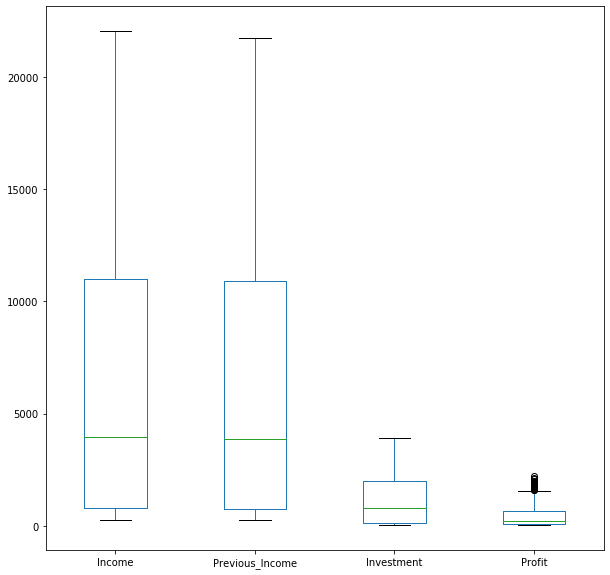

In [7]:
DF.plot(figsize=(10,10), kind='box')
plt.show()

In [8]:
DF[DF['Profit']>520.854679+1.5*(669.457750-53.475250)] #check outllier for profit column

,Date,Income,Previous_Income,Investment,Profit
250,2009-10-01,14628.0,14420.3,1998.7,1462.942
251,2010-01-01,14721.4,14628.0,2038.2,1530.604
252,2010-04-01,14926.1,14721.4,2148.8,1517.068
253,2010-07-01,15079.9,14926.1,2236.5,1600.154
254,2010-10-01,15240.8,15079.9,2238.4,1599.159
255,2011-01-01,15285.8,15240.8,2206.0,1464.223
256,2011-04-01,15496.2,15285.8,2297.4,1529.084
257,2011-07-01,15591.9,15496.2,2322.8,1539.465
258,2011-10-01,15796.5,15591.9,2504.1,1617.095
259,2012-01-01,16019.8,15796.5,2567.8,1880.022


======================================================================================================================= <br>
There are no outlier in Income, Previous Income, and Investment. The outlier for Profit variable is the data from the fourth quarter of 2009 to first quarter of 2021 and thus, we won't remove the outliers since it is a time series data. 
======================================================================================================================= <br>

### Pair Plot Between Variables

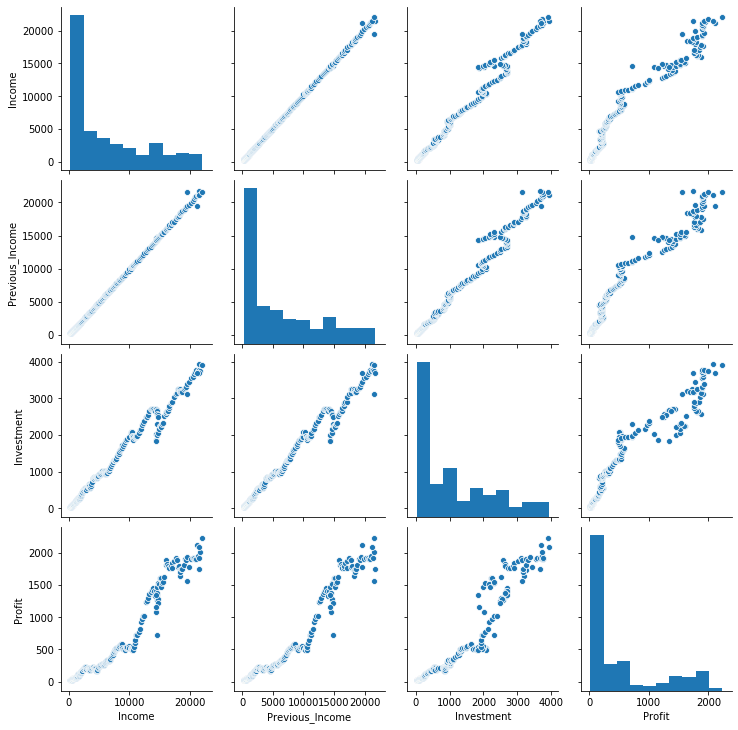

In [9]:
sns.pairplot(data=DF)
plt.show()

======================================================================================================================= <br>
The pairplot shows that there are linear positive correlations between two variables. 
======================================================================================================================= <br>

### Correlation Between Variables and Correlation Heat Map

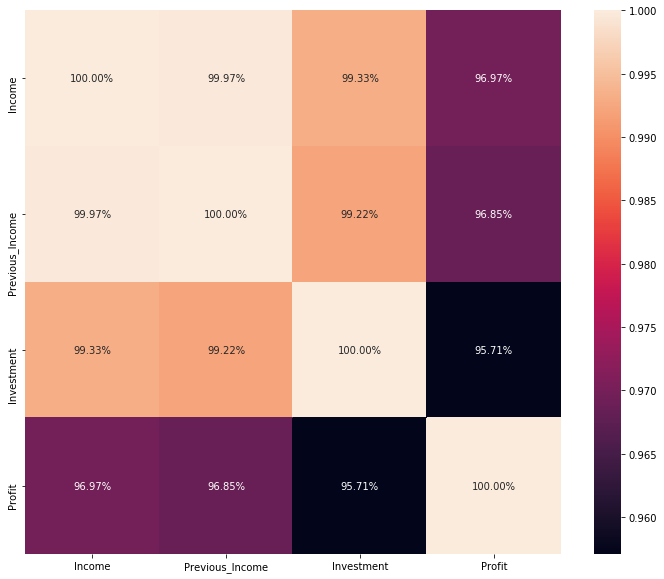

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(DF.corr(), annot=True, fmt='.2%')
plt.show()

======================================================================================================================= <br>
The heatmap supports our hypothesis above that all of the correlation are strong positive correlations. 
======================================================================================================================= <br>

### Train Test Split

The train test split follows the time series train test split rule.

In [11]:
size = int(len(DF)*0.8) #take 80% of the initial data as train data and 20% as test data
df_train, df_test = DF.iloc[:size], DF.iloc[size:]
df_train

,Date,Income,Previous_Income,Investment,Profit
0,1947-04-01,246.0,243.2,34.5,20.788
1,1947-07-01,249.6,246.0,34.9,20.564
2,1947-10-01,259.7,249.6,43.3,22.451
3,1948-01-01,265.7,259.7,47.2,23.739
4,1948-04-01,272.6,265.7,50.3,24.941
...,...,...,...,...,...
231,2005-01-01,12761.3,12522.4,2486.1,1228.657
232,2005-04-01,12910.0,12761.3,2476.5,1252.584
233,2005-07-01,13142.9,12910.0,2531.1,1296.981
234,2005-10-01,13332.3,13142.9,2645.3,1363.540


## <font color='blue'>Hausman Test</font>

$H_0$ = There is no simultaneity<br>
$H_1$ = There is simultaneity<br>

### Regress The Endogenous Variable Investment on Previous Income and Profit to Obtain Estimated Residual

In [12]:
HT = df_train.copy()
HT = sm.tools.tools.add_constant(HT)
Reg_Inv = sm.OLS(HT["Investment"],HT[['const','Previous_Income','Profit']])
Mod_Reg_Inv = Reg_Inv.fit()

### Regress The Endogenous Variable Income on Predicted Investment, Previous Income, and Estimated Residual

In [13]:
HT['Pred_Investment'] = Mod_Reg_Inv.predict()
HT['Residual'] = Mod_Reg_Inv.resid

Reg_Inc = sm.OLS(HT['Income'], HT[['const','Previous_Income','Pred_Investment','Residual']])
Mod_Reg_Inc = Reg_Inc.fit()
print(Mod_Reg_Inc.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.394e+06
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:36:22   Log-Likelihood:                -1121.0
No. Observations:                 236   AIC:                             2250.
Df Residuals:                     232   BIC:                             2264.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.9448      2.775     

In [14]:
dependent = HT['Income']
exo = HT['Previous_Income']
endogen = HT['Investment']
inst = HT['Profit']
ivmod = IV2SLS(dependent, exo, endogen, inst)
res_2sls = ivmod.fit()
res_2sls.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 7.7377
P-value: 0.0059
Distributed: F(1,233)
WaldTestStatistic, id: 0x1ea7fba9dc8

======================================================================================================================= <br>
Since the residual p-value from the OLS summary above and the p-value of the Wu-Hausman is lower than 5%, we reject $H_0$. Thus, investment is a endogenous variables to predict income.
======================================================================================================================= <br>

## <font color='blue'>Modelling using 2SLS to Predict Income</font>

In [15]:
Formula = 'Income ~ 1 + Previous_Income + [Investment ~ Profit]'
Model_2SLS = IV2SLS.from_formula(Formula, df_train).fit(cov_type = 'robust')
print(Model_2SLS.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 Income   R-squared:                      0.9999
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9999
No. Observations:                 236   F-statistic:                 2.005e+06
Date:                Sun, Jul 11 2021   P-value (F-stat)                0.0000
Time:                        21:36:22   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
Intercept           13.945     2.6404     5.2814     0.0000      8.7698      19.120
Previous_Income     0.9408     0

In [16]:
print(Model_2SLS.first_stage)

    First Stage Estimation Results    
                            Investment
--------------------------------------
R-squared                       0.9925
Partial R-squared               0.1605
Shea's R-squared                0.1605
Partial F-statistic             29.676
P-value (Partial F-stat)     5.107e-08
Partial F-stat Distn           chi2(1)
========================== ===========
Intercept                      -9.6952
                             (-3.2557)
Previous_Income                 0.1677
                              (36.172)
Profit                          0.2977
                              (5.4476)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


======================================================================================================================= <br>
The Model that we get from the summary is<br>
$\hat {Y_t} = 13.945 + 0.9408 Y_{t-1} + 0.3857 \hat{I_t}$<br>

where<br>
$\hat {I_t} = -9.6952 + 0.1677 Y_{t-1} + 0.2977 Q_t$<br>

From the IV-2SLS Estimation Summary, the p-value of Previous Income and Investment is lower than 0.05 which means they are significant to predict Income. Both the $R^2$ and Adj $R^2$ is higher than 0.75 which indicates that the model could predict the quarterly national income data very well. The first stage estimation result shows us the linear regression equation above to predict $I_t$. 
======================================================================================================================= <br>

## <font color='blue'>Modelling using OLS to Predict Income</font>

In [17]:
ols = df_train.copy()
ols = sm.tools.tools.add_constant(ols)
X1 = ols[['const','Previous_Income', 'Profit']]
Y1 = ols['Investment']
Model_OLS1 = sm.OLS(Y1,X1).fit()
print(Model_OLS1.summary()) #The OLS Regression Results below is the same as First Stage Estimation Results in 2SLS method 

                            OLS Regression Results                            
Dep. Variable:             Investment   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.544e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          2.38e-248
Time:                        21:36:22   Log-Likelihood:                -1303.0
No. Observations:                 236   AIC:                             2612.
Df Residuals:                     233   BIC:                             2622.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -9.6952      5.616     

In [18]:
ols['Pred_Investment'] = Model_OLS1.predict()
X2 = ols[['const','Previous_Income', 'Pred_Investment']]
Y2 = ols['Income']
Model_OLS2 = sm.OLS(Y2,X2).fit()
print(Model_OLS2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.922e+06
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:36:22   Log-Likelihood:                -1131.5
No. Observations:                 236   AIC:                             2269.
Df Residuals:                     233   BIC:                             2279.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.9448      2.895     

======================================================================================================================= <br>
The model produced using OLS method is the same as two-staged least squared. Thus, both method could be used to predict National Income (GDP).
======================================================================================================================= <br>

## <font color='blue'>Uji Asumsi Klasik</font>

### Multicollinearity

There are no multicollinearity since there is only one exogenous variable for each equation.

### Residual Normality

In [19]:
df_train["Resid Final"] = Model_2SLS.resids

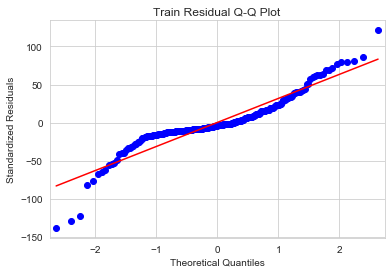

In [20]:
sns.set_style('whitegrid')
sm.qqplot(df_train['Resid Final'], line='s')
plt.title('Train Residual Q-Q Plot')
plt.ylabel('Standardized Residuals')
py.show()

In [21]:
labels = ['JB', 'JB p-value', 'skew', 'kurtosis']
Jb = statsmodels.stats.stattools.jarque_bera(df_train['Resid Final'], axis=0)
print(dict(zip(labels, Jb)))

{'JB': 175.05301679119944, 'JB p-value': 9.721211310873134e-39, 'skew': -0.22410712017498513, 'kurtosis': 7.19536717133639}


======================================================================================================================= <br>
The Residual Q-Q plot shows that the line is not straight enough, which suggest the error distribution is not normal. Supported with the JB p-value < 5% which indicates that the residual distribution is not normal. The skewness between -0.5 and 0.5 indicates the data is fairly symmetrical but the kurtosis greater than 3, indicates the distribution' shape is thin “bell” with a high peak. 

Since the normality assumption is failed to hold. Thus, we try to transform the model without checking the homoskedasticity assumption.
======================================================================================================================= <br>

## <font color='blue'>Transformation</font>

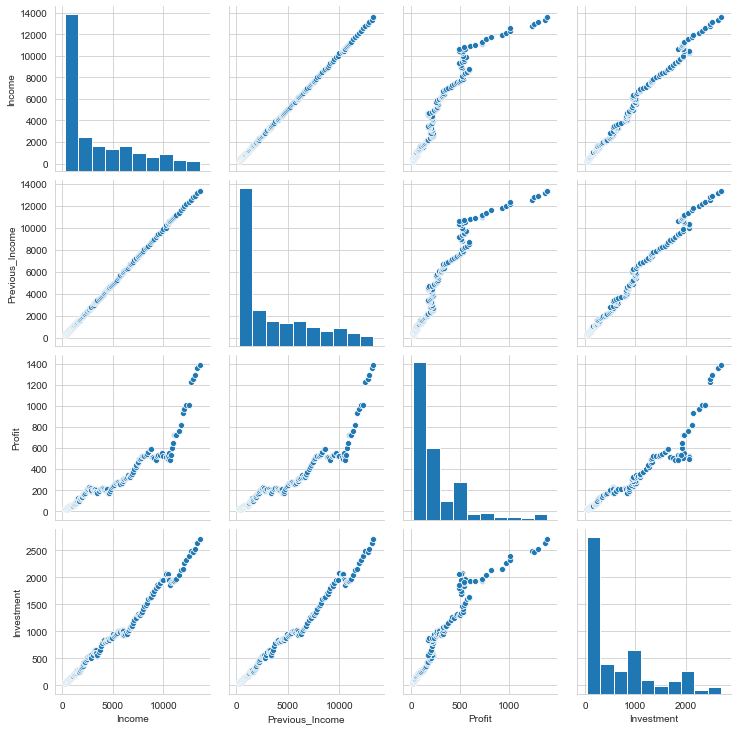

In [22]:
tf = df_train[['Income','Previous_Income','Profit','Investment']].copy()
sns.pairplot(data = tf)
plt.show()

======================================================================================================================= <br>
Above pairplot shows that all variables above is a right-skewed distribution. Therefore, we will use log transformation or square or higher roots transformation for all variable.
======================================================================================================================= <br>

In [23]:
tf['logIncome'] = np.log(tf['Income'])
tf['logPrevious_Income'] = np.log(tf['Previous_Income'])
tf['logProfit'] = np.log(tf['Profit'])
tf['logInvestment'] = np.log(tf['Investment'])

### Modelling using 2SLS to Predict Log Income

In [24]:
TFormula = 'logIncome ~ 1 + logPrevious_Income + [logInvestment ~ logProfit]'
TModel_2SLS = IV2SLS.from_formula(TFormula, tf).fit(cov_type = 'robust')
print(TModel_2SLS.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:              logIncome   R-squared:                      0.9999
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9999
No. Observations:                 236   F-statistic:                 4.615e+06
Date:                Sun, Jul 11 2021   P-value (F-stat)                0.0000
Time:                        21:36:32   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                  
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
Intercept              0.2218     0.0299     7.4124     0.0000      0.1632      0.2805
logPrevious_Income  

In [25]:
print(TModel_2SLS.first_stage)

     First Stage Estimation Results     
                           logInvestment
----------------------------------------
R-squared                         0.9962
Partial R-squared                 0.2046
Shea's R-squared                  0.2046
Partial F-statistic               45.529
P-value (Partial F-stat)       1.504e-11
Partial F-stat Distn             chi2(1)
==========================   ===========
Intercept                        -1.4878
                               (-16.432)
logPrevious_Income                0.8321
                                (26.414)
logProfit                         0.2134
                                (6.7475)
----------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


======================================================================================================================= <br>
The Model that we get from the summary is<br>
$\hat {ln(Y_t)} = 0.2218 + 0.8958 ln(Y_{t-1}) + 0.1001 \hat{ln(I_t)}$<br>

where<br>
$\hat {ln(I_t)} = -1.4878 + 0.8321 ln(Y_{t-1}) + 0.2134 ln(Q_t)$<br>

From the IV-2SLS Estimation Summary, the p-value of log Previous Income and log Investment is lower than 0.05 which means they are significant to predict Income. The $R^2$ and Adj $R^2$ is the same as original model. The first stage estimation result shows us the linear regression equation above to predict $ln(I_t)$. 
======================================================================================================================= <br>

### Modelling using OLS to Predict Log Income

In [26]:
ols1 = tf.copy()
ols1 = sm.tools.tools.add_constant(ols1)
tX1 = ols1[['const','logPrevious_Income', 'logProfit']]
tY1 = ols1['logInvestment']
tModel_OLS1 = sm.OLS(tY1,tX1).fit()
print(tModel_OLS1.summary())

                            OLS Regression Results                            
Dep. Variable:          logInvestment   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.083e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          3.67e-283
Time:                        21:36:32   Log-Likelihood:                 264.12
No. Observations:                 236   AIC:                            -522.2
Df Residuals:                     233   BIC:                            -511.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4878      0

In [27]:
ols1['Pred_logInvestment'] = tModel_OLS1.predict()
tX2 = ols1[['const','logPrevious_Income', 'Pred_logInvestment']]
tY2 = ols1['logIncome']
tModel_OLS2 = sm.OLS(tY2,tX2).fit()
print(tModel_OLS2.summary()) 

                            OLS Regression Results                            
Dep. Variable:              logIncome   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.710e+06
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:36:32   Log-Likelihood:                 746.45
No. Observations:                 236   AIC:                            -1487.
Df Residuals:                     233   BIC:                            -1477.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2218      0

======================================================================================================================= <br>
The model produced using OLS method is the same as two-staged least squared. Thus, both method could be used to predict National Income (GDP).
======================================================================================================================= <br>

### Uji Asumsi Klasik

#### Multicollinearity

There are no multicollinearity since there is only one exogenous variable for each equation.

#### Residual Normality

In [28]:
tf["Resid Final"] = TModel_2SLS.resids

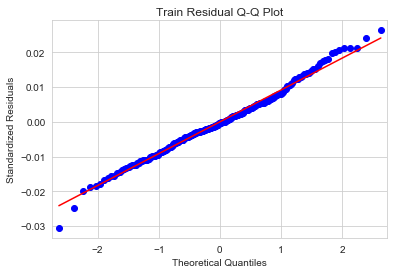

In [29]:
sns.set_style('whitegrid')
sm.qqplot(tf['Resid Final'], line='s')
plt.title('Train Residual Q-Q Plot')
plt.ylabel('Standardized Residuals')
py.show()

In [30]:
tJb = statsmodels.stats.stattools.jarque_bera(tf['Resid Final'], axis=0)
print(dict(zip(labels, tJb)))

{'JB': 2.1687904954129493, 'JB p-value': 0.33810619457679914, 'skew': 0.13301680571892585, 'kurtosis': 3.387015611081193}


======================================================================================================================= <br>
From the normal Q-Q plot, we can see that we almost have a straight line, which suggest normality in error distribution. Supported with the JB p-value > 5% which indicates that the residual distribution is normal. The skewness between -0.5 and 0.5 indicates the data is fairly symmetrical and the kurtosis around 3 indicates the distribution is normal. 
======================================================================================================================= <br>

#### Homoskedasticity

We will use Breusch-Pagan heteroscedasticity test

In [31]:
m1 = 'logIncome ~ 1 + logInvestment + logPrevious_Income '
y, X = dmatrices(m1, tf, return_type = 'dataframe')

bp_Income = het_breuschpagan(tf["Resid Final"], X)
bp_Income

print("Breusch-Pagan Statistics:", bp_Income[0])
print("Breusch-Pagan P-Value:", bp_Income[1])

Breusch-Pagan Statistics: 5.9154329598514135
Breusch-Pagan P-Value: 0.05193738191715138


======================================================================================================================= <br>
Since the Breusch Pagan p-value is > 0.05, it is indicated as homoskedasticity. So according to these tests, this model is homoskedastic.
======================================================================================================================= <br>

## <font color='blue'>Predicting Test Dataset</font>

### Original Model

In [32]:
df_test1 = df_test.copy()
df_test1['Pred_Income'] = Model_2SLS.predict(data = df_test1)
df_test1['Residual Income'] = df_test1['Income'] - df_test1['Pred_Income']
df_test1['Residual Sq Income'] = df_test1['Residual Income']**2

RS_1 = df_test1['Residual Income'].sum()
print('Sum of Residual:', RS_1)
RSS_1 = df_test1['Residual Sq Income'].sum()
print('Sum of Residual Sq:', RSS_1)
RMSE_1 = (df_test1['Residual Sq Income'].sum())**(1/2)
print('Root Mean Square Error:', RMSE_1)
R2_1 = 1 - (RSS_1/(((df_test1['Income'] - df_test1['Income'].mean())**2).sum()))
print(f'R\N{SUPERSCRIPT TWO}: {R2_1}')

Sum of Residual: 1043.3701358700546
Sum of Residual Sq: 6731357.131059389
Root Mean Square Error: 2594.485908818814
R²: 0.9827873970190768


### Transformed Model

In [33]:
df_test2 = df_test.copy()
df_test2['logIncome'] = np.log(df_test2['Income'])
df_test2['logPrevious_Income'] = np.log(df_test2['Previous_Income'])
df_test2['logProfit'] = np.log(df_test2['Profit'])
df_test2['logInvestment'] = np.log(df_test2['Investment'])

df_test2['Pred_logIncome'] = TModel_2SLS.predict(data = df_test2)
df_test2['Residual logIncome'] = df_test2['logIncome'] - df_test2['Pred_logIncome']
df_test2['Residual Sq logIncome'] = df_test2['Residual logIncome']**2

RS_2 = df_test2['Residual logIncome'].sum()
print('Sum of Residual:', RS_2)
RSS_2 = df_test2['Residual Sq logIncome'].sum()
print('Sum of Residual Sq:', RSS_2)
RMSE_2 = (df_test2['Residual Sq logIncome'].sum())**(1/2)
print('Root Mean Square Error:', RMSE_2)
R2_2 = 1 - (RSS_2/(((df_test2['Income'] - df_test2['Income'].mean())**2).sum()))
print(f'R\N{SUPERSCRIPT TWO}: {R2_2}')

Sum of Residual: 0.286133174662913
Sum of Residual Sq: 0.0190813341267614
Root Mean Square Error: 0.1381352023445197
R²: 0.9999999999512076


In [34]:
df_test2['Pred_Income'] = np.exp(df_test2['Pred_logIncome'])
df_test2['Residual Income'] = df_test2['Income'] - df_test2['Pred_Income']
df_test2['Residual Sq Income'] = df_test2['Residual Income']**2

RS_3 = df_test2['Residual Income'].sum()
print('Sum of Residual:', RS_3)
RSS_3 = df_test2['Residual Sq Income'].sum()
print('Sum of Residual Sq:', RSS_3)
RMSE_3 = (df_test2['Residual Sq Income'].sum())**(1/2)
print('Root Mean Square Error:', RMSE_3)

Sum of Residual: 4652.209502714764
Sum of Residual Sq: 6754184.72732192
Root Mean Square Error: 2598.881437719297


In [35]:
p = ['Sum of Residual', 'Sum of Residual Squared', 'Root Mean Square Error', 'R-squared']
m1 = [RS_1, RSS_1, RMSE_1, R2_1]
m2 = [RS_3, RSS_3, RMSE_3, R2_2]

columns = {' ': p, 
           'Original Model': m1, 
           'Transformed Model': m2}
compare = pd.DataFrame(columns).set_index(' ')
compare

,Original Model,Transformed Model
,,
Sum of Residual,1.043370e+03,4.652210e+03
Sum of Residual Squared,6.731357e+06,6.754185e+06
Root Mean Square Error,2.594486e+03,2.598881e+03
R-squared,9.827874e-01,1.000000e+00


======================================================================================================================= <br>
Based on the comparison table above shows that the original model have lowest sum of residual, sum of residual squared, and root mean square error value. But the transformed model could predict the log of income more accurately and it's R-squared is better than the original model. and 

### <font color='red'>Conclusion:</font>
The best model to use to predict the National Income (GDP) is the transformed model since it has the highest R-squared and is able to fullfil all of the classic assumption for the regression. Even though the original model have the smallest value of the Sum of Residual, Sum of Residual Squared, and the Root Mean Square Error while predicting the National Income, the classic assumption for regression is failed to hold. 
======================================================================================================================= <br>